### Task_1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston
plt.style.use('fivethirtyeight')

%config InLineBackend.figure_format='svg'
%matplotlib inline

In [2]:
boston = load_boston()

C:\Users\Temirlan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [3]:
data = boston.data
feature_names = boston.feature_names

In [4]:
X = pd.DataFrame(data, columns=feature_names)

In [5]:
price = boston.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
X_train_scaled = scaler.fit_transform(X_train)

In [13]:
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [14]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [15]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [16]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

C:\Users\Temirlan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


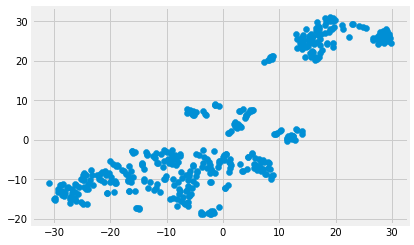

In [18]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

### Task_2

In [19]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [25]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [26]:
labels_test = kmeans.predict(X_test_scaled)

In [27]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

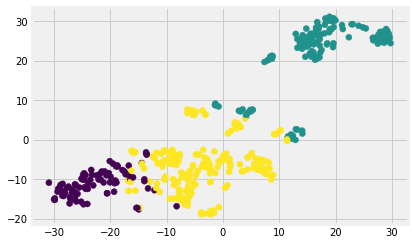

In [29]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train)

In [31]:
y_train.mean()

22.796534653465343

In [34]:
y_train[labels_train==0].mean()

27.78837209302326

In [35]:
y_train[labels_train==1].mean()

16.165354330708663

In [36]:
y_train[labels_train==2].mean()

24.958115183246072

Text(0.5, 0, "['Цена']")

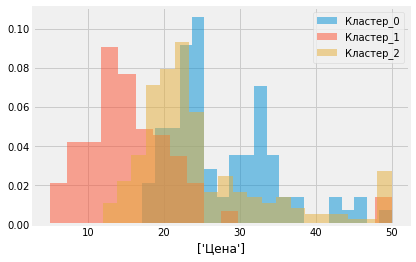

In [41]:
plt.hist(y_train[labels_train==0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train==1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train==2], bins=20, density=True, alpha=0.5)
plt.legend(['Кластер_0', 'Кластер_1','Кластер_2'])
plt.xlabel(['Цена'])

In [37]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

In [38]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [39]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367

(0.0, 2.0)

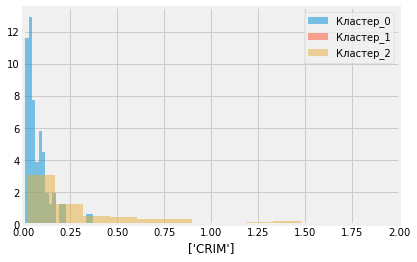

In [46]:
plt.hist(X_train.loc[labels_train==0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train==1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train==2, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.legend(['Кластер_0', 'Кластер_1','Кластер_2'])
plt.xlabel(['CRIM'])
plt.xlim(0, 2)

### Task_3

In [47]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

C:\Users\Temirlan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


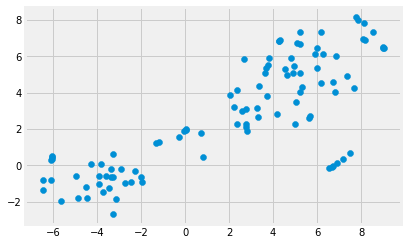

In [48]:
plt.scatter(X_test_tsne[:,0], X_test_tsne[:,1])

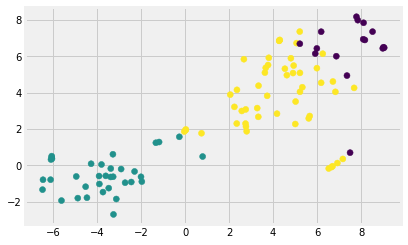

In [49]:
plt.scatter(X_test_tsne[:,0], X_test_tsne[:,1], c=labels_test)

In [50]:
y_test[labels_test==0].mean()

31.35

In [52]:
y_test[labels_test==1].mean()

16.43714285714286

In [53]:
y_test[labels_test==2].mean()

21.860784313725492

Text(0.5, 0, "['Цена']")

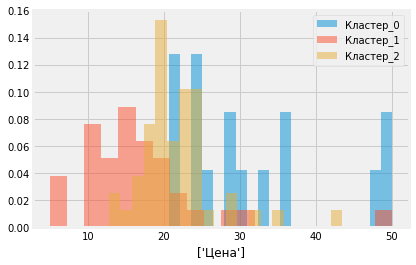

In [55]:
plt.hist(y_test[labels_test==0], bins=20, density=True, alpha=0.5)
plt.hist(y_test[labels_test==1], bins=20, density=True, alpha=0.5)
plt.hist(y_test[labels_test==2], bins=20, density=True, alpha=0.5)
plt.legend(['Кластер_0', 'Кластер_1','Кластер_2'])
plt.xlabel(['Цена'])

In [56]:
X_test.loc[labels_test==0, 'CRIM'].mean()

0.062060000000000004

In [58]:
X_test.loc[labels_test==1, 'CRIM'].mean()

10.165531142857143

In [59]:
X_test.loc[labels_test==2, 'CRIM'].mean()

0.26607882352941176

(0.0, 1.5)

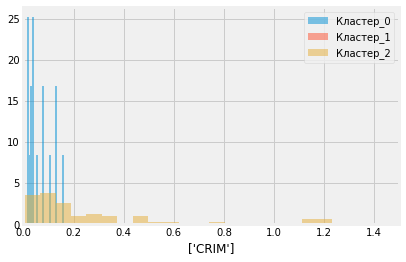

In [62]:
plt.hist(X_test.loc[labels_test==0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_test.loc[labels_test==1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_test.loc[labels_test==2, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.legend(['Кластер_0', 'Кластер_1','Кластер_2'])
plt.xlabel(['CRIM'])
plt.xlim(0, 1.5)